# TP Scoring: 

## Membres: Linsey Nkatouloulou & Guilhem Mobasso

## Librairies

In [15]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
table = pq.read_table('../data/cleaned_data.parquet')
cleaned_df = table.to_pandas()

In [4]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
0,0.0,840,2003-12-02,2024-06-24 17:47:52,2003-12-02,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1
1,1.0,158,2003-11-25,2024-06-24 06:00:20,2003-11-25,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
2,2.0,826,2003-11-12,2024-06-24 14:10:57,2003-11-12,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
3,3.0,840,2003-11-07,2024-06-24 03:41:55,2003-11-07,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1
4,4.0,158,2003-11-23,2024-06-24 05:07:03,2003-11-23,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
5,5.0,158,2003-11-17,2024-06-24 02:26:28,2003-11-17,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
6,6.0,840,2003-12-03,2024-06-24 02:52:14,2003-12-03,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1
7,6.0,840,2003-12-04,2024-06-24 02:36:37,2003-12-04,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1
8,6.0,840,2003-12-05,2024-06-24 02:46:17,2003-12-05,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1
9,6.0,840,2003-12-06,2024-06-24 02:30:31,2003-12-06,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1


In [6]:
cleaned_df.shape

(1151432, 25)

In [8]:
# Tableau récapitulatifs sur les modalités de chaques variables

df_dtypes = cleaned_df.dtypes.reset_index().rename(columns={'index':'Champ',0:'Type'})
df_dtypes

for i in cleaned_df.columns:
    df_dtypes.loc[df_dtypes['Champ']==i,'Modalités'] = str(sorted(cleaned_df[i].unique().tolist()))
    df_dtypes.loc[df_dtypes['Champ']==i,'NbDistinctVal'] = cleaned_df[i].nunique()
    
df_dtypes

,Champ,Type,Modalités,NbDistinctVal
0,carte,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",198044.0
1,pays,object,"['008', '012', '020', '028', '031', '032', '03...",167.0
2,date,datetime64[ns],"[1067644800000000000, 1067731200000000000, 106...",243.0
3,heure,datetime64[ns],"[1719187200000000000, 1719187201000000000, 171...",85697.0
4,dateheure,datetime64[ns],"[1067644800000000000, 1067731200000000000, 106...",243.0
5,coderep,object,"['00', '02', '05', '07', '14', '15', '30', '41...",15.0
6,mcc,object,"['0000', '0001', '0004', '0100', '0596', '0741...",661.0
7,montant,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",81202.0
8,fraude,float64,"[0.0, 1.0]",2.0
9,fm_velocity_condition_3,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",47.0


## I- Traitement des valeurs extrêmes

In [11]:
var_num = ['montant','fm_sum_3'	,'fm_sum_6',	'fm_sum_12',	'fm_sum_24',	'fm_redondance_mcc_3',	'fm_redondance_mcc_6',	'fm_redondance_mcc_12',	'fm_redondance_mcc_24',	'fm_difference_pays_3',	'fm_difference_pays_6',	'fm_difference_pays_12',	'fm_difference_pays_24']
var_num_1 = ['montant']
var_num_2 = ['fm_sum_3','fm_sum_6','fm_sum_12','fm_sum_24']
var_num_3 = [	'fm_redondance_mcc_3',	'fm_redondance_mcc_6',	'fm_redondance_mcc_12',	'fm_redondance_mcc_24',	'fm_difference_pays_3',	'fm_difference_pays_6',	'fm_difference_pays_12',	'fm_difference_pays_24']
var_car = ['carte'	,'pays',	'coderep',	'mcc']

In [21]:
def boxplot_(var, dataframe, sample_fraction=0.01):
   
    df_sampled = dataframe.sample(frac=sample_fraction, random_state=42)
    
    plt.figure(figsize=(9, 7))
    ax = sns.boxplot(y=df_sampled[var])
    
    mean_val = df_sampled[var].mean()
    p99_val = np.percentile(df_sampled[var], 99)
    p01_val = np.percentile(df_sampled[var], 1)
    
    ax.axhline(mean_val, ls='--', color='red', label=f"Mean = {mean_val:.2f}")
    ax.axhline(p99_val, ls='--', color='green', label=f"P99 = {p99_val:.2f}")
    ax.axhline(p01_val, ls='--', color='blue', label=f"P01 = {p01_val:.2f}")
    ax.set_ylim(p01_val - (p99_val - p01_val) * 0.1, p99_val + (p99_val - p01_val) * 0.1)
    
    
    ax.legend(loc='best')
    ax.set_title(f"Etude de la variable {var} \n")
    plt.show()

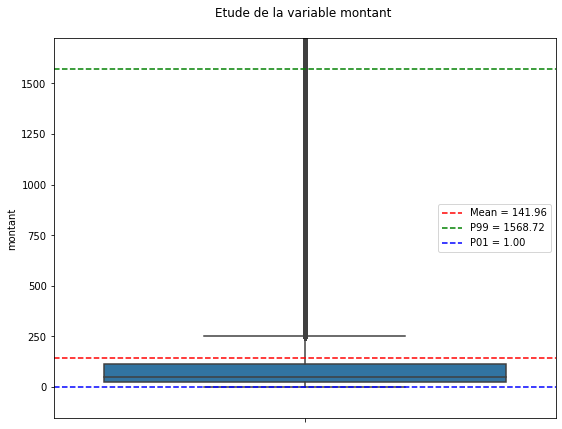

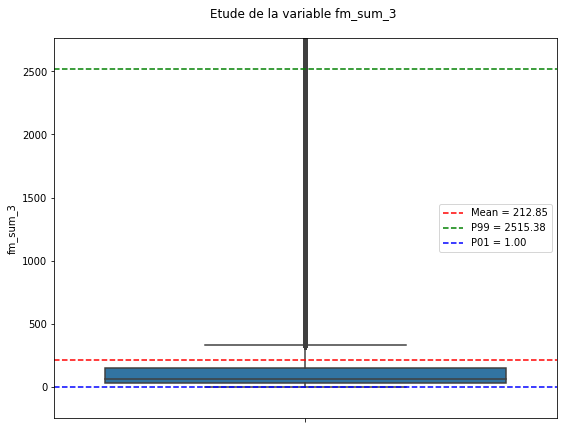

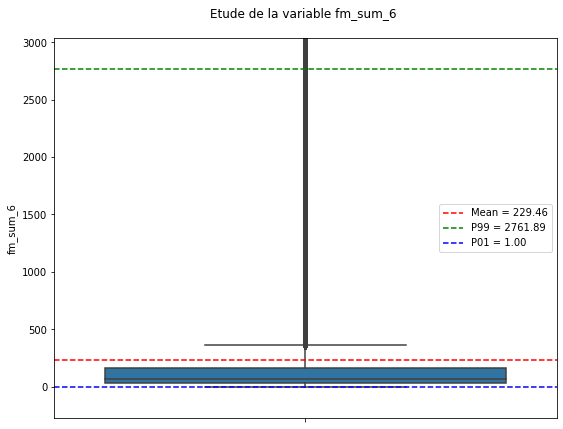

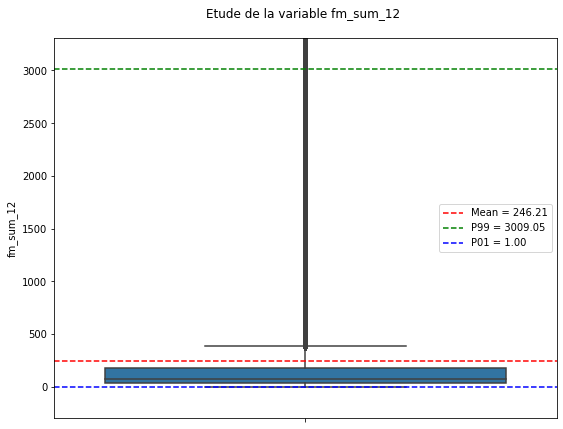

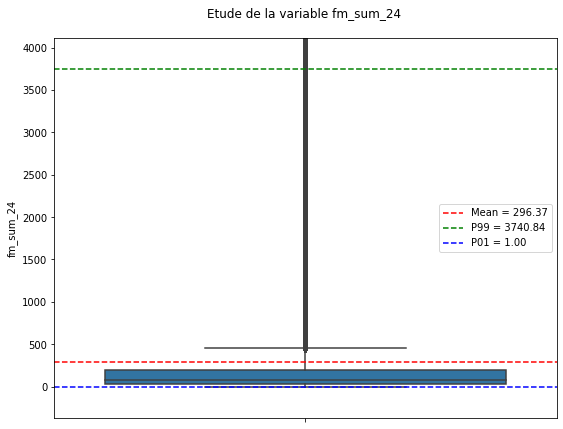

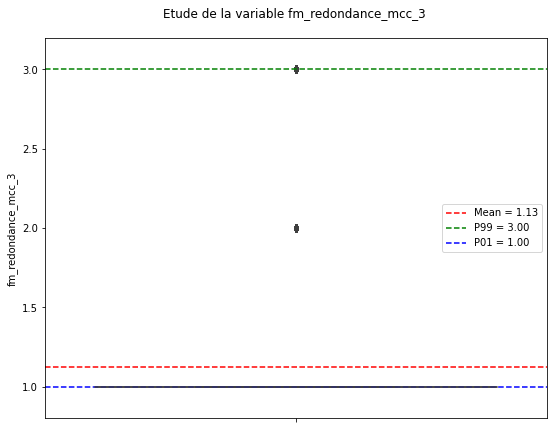

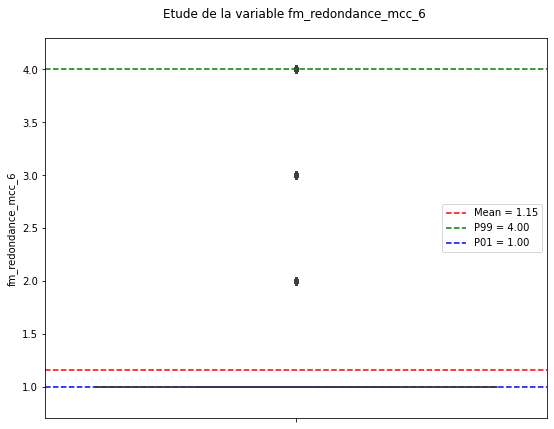

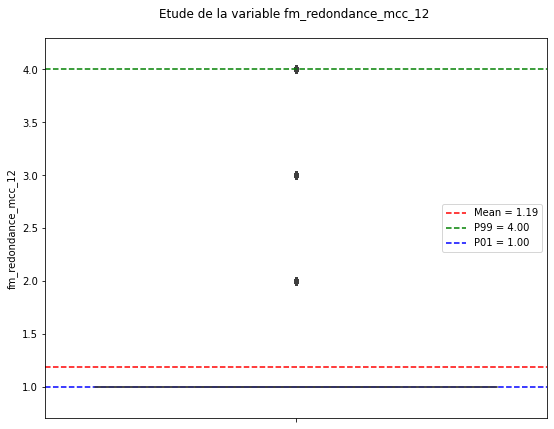

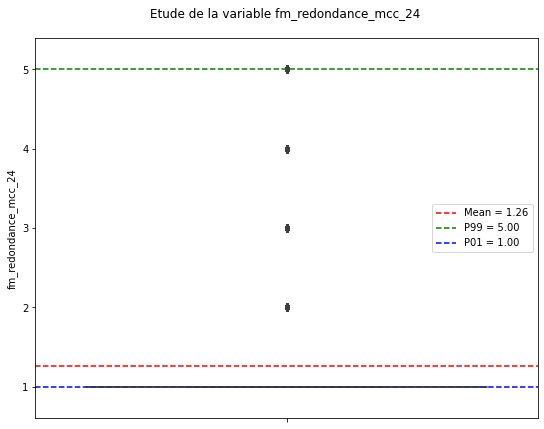

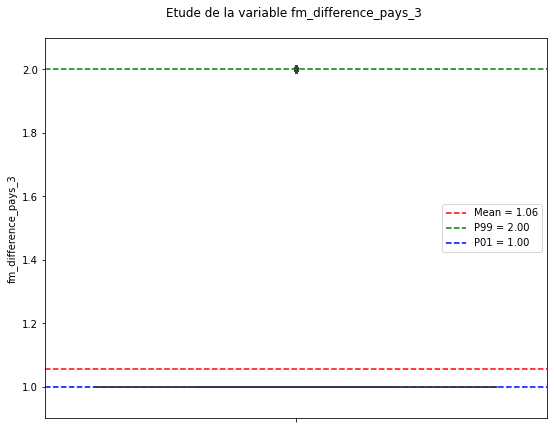

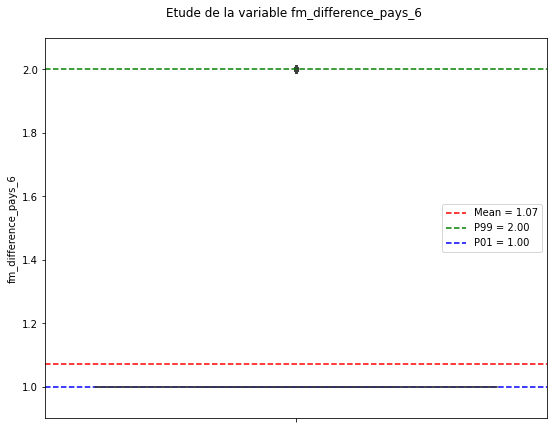

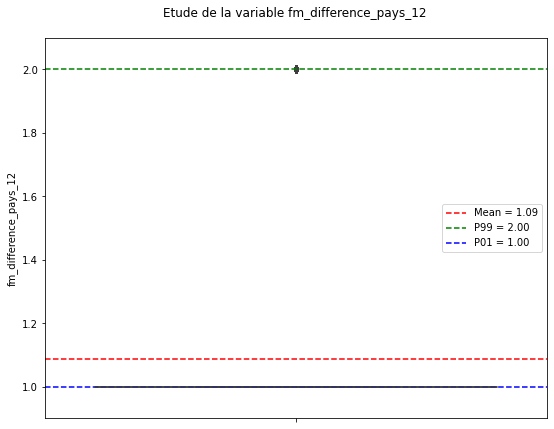

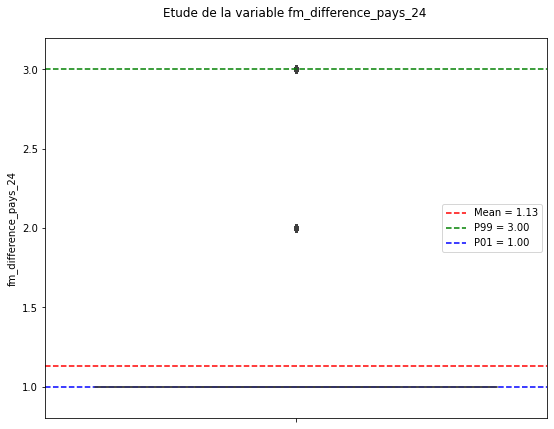

In [22]:
for var in var_num:
    boxplot_(var, cleaned_df, sample_fraction=1)

In [38]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (len(df[(df[column] < low) | (df[column] > high)])/len(cleaned_df))*100

var_num_4 = var_num_1 + var_num_2

for i in var_num:
    # Détection des valeurs extrêmes pour la colonne "Height"
    outliers = detect_outliers_iqr(cleaned_df, i)
    print(f"Valeurs extrêmes pour {i} (IQR):", round(outliers,2), '%')

Valeurs extrêmes pour montant (IQR): 11.57 %
Valeurs extrêmes pour fm_sum_3 (IQR): 11.62 %
Valeurs extrêmes pour fm_sum_6 (IQR): 11.57 %
Valeurs extrêmes pour fm_sum_12 (IQR): 11.58 %
Valeurs extrêmes pour fm_sum_24 (IQR): 11.48 %
Valeurs extrêmes pour fm_redondance_mcc_3 (IQR): 7.91 %
Valeurs extrêmes pour fm_redondance_mcc_6 (IQR): 9.2 %
Valeurs extrêmes pour fm_redondance_mcc_12 (IQR): 10.56 %
Valeurs extrêmes pour fm_redondance_mcc_24 (IQR): 13.8 %
Valeurs extrêmes pour fm_difference_pays_3 (IQR): 4.9 %
Valeurs extrêmes pour fm_difference_pays_6 (IQR): 6.04 %
Valeurs extrêmes pour fm_difference_pays_12 (IQR): 7.21 %
Valeurs extrêmes pour fm_difference_pays_24 (IQR): 9.84 %


In [39]:
# Visualisation sur une variable

def detect_outliers_iqr_data(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return df[(df[column] < low) | (df[column] > high)]

detect_outliers_iqr_data(cleaned_df,'montant').head()

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
2,2.0,826,2003-11-12,2024-06-24 14:10:57,2003-11-12,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
14,11.0,840,2003-12-04,2024-06-24 23:44:30,2003-12-04,15,5969,269.87,0.0,0,0,0,0,269.87,269.87,269.87,269.87,1,1,1,1,1,1,1,1
15,12.0,840,2003-12-04,2024-06-24 23:38:40,2003-12-04,15,5969,269.87,0.0,0,0,0,0,269.87,269.87,269.87,269.87,1,1,1,1,1,1,1,1
17,14.0,840,2003-11-30,2024-06-24 23:40:07,2003-11-30,15,5964,308.90,0.0,0,0,0,0,308.90,308.90,308.90,308.90,1,1,1,1,1,1,1,1
18,15.0,840,2003-11-26,2024-06-24 13:25:27,2003-11-26,15,4214,1602.48,0.0,0,0,0,0,1602.48,1602.48,1602.48,1602.48,1,1,1,1,1,1,1,1


### TO DO:

- Sélections des variabes
- Changer les formats
- Traitement des valeurs extrêmes